## Types of Hierarchical Clustering

### Agglomerative
- **Bottom-up approach**: Initially, each point is a cluster, then merged later.

### Divisive
- **Top-down approach**: Initially, there is only one cluster, then separated later.

## Agglomerative Clustering Steps
1. Make each point a single cluster.
2. Take two closest points and merge them into one cluster.
3. Repeat step 2 until only one cluster is left.

### Methods for Choosing the Closest Points
- **Single Linkage**: Distance of the two closest points in clusters.
- **Average Linkage**: Average distance between points in clusters.
- **Centroid Linkage**: Distance between the centroids of clusters.
- **Complete Linkage**: Distance of the farthest points in clusters.

All the information is stored in a data structure called a **Dendrogram**, where you can set the threshold and get the required number of clusters.

**Note**: Hierarchical Clustering is computationally expensive and hence is not recommended for large datasets.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
# 'Mall_Customers.csv' should be in the same directory as your script or provide the full path
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataframe to understand its structure
# Using print() function to display the output in the console
print(df.head())

# Extract the relevant features (Annual Income and Spending Score)
# Assuming the 4th and 5th columns are 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df.iloc[:, [3, 4]].values


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


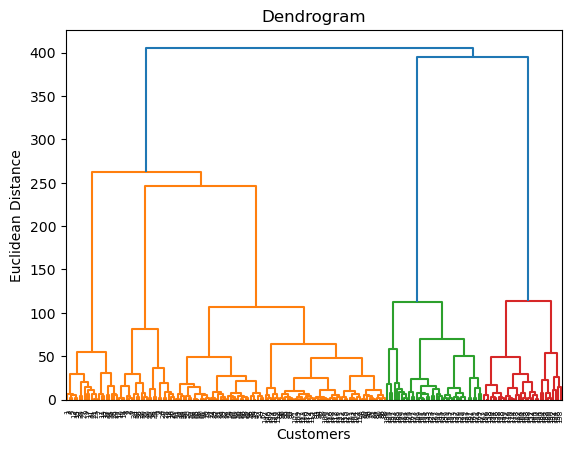

In [2]:
# Import necessary libraries
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Using Dendrogram to find the optimal number of clusters
# The dendrogram helps visualize the hierarchical clustering and determine the optimal number of clusters
dendrogram = sch.dendrogram(
    sch.linkage(X, method='ward')  # The 'ward' method minimizes the variance within each cluster
)

# Add title and labels to the plot for better understanding
plt.title('Dendrogram')  # Title of the plot
plt.xlabel('Customers')  # X-axis label representing the data points (customers)
plt.ylabel('Euclidean Distance')  # Y-axis label representing the distance between clusters

# Display the plot
plt.show()  # Render the plot


In [5]:
# Import the AgglomerativeClustering class from the sklearn.cluster module
from sklearn.cluster import AgglomerativeClustering

# Initialize the AgglomerativeClustering object with the desired parameters
# n_clusters: The number of clusters to form
# metric: Metric used to compute the linkage, 'euclidean' is the default and most common choice
# linkage: The linkage criterion to use, 'ward' minimizes the variance of the clusters being merged
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# Fit the hierarchical clustering model to the data and predict the cluster for each data point
# X: The input data (features) to cluster
y_hc = hc.fit_predict(X)

# Output the cluster labels for each data point
y_hc


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

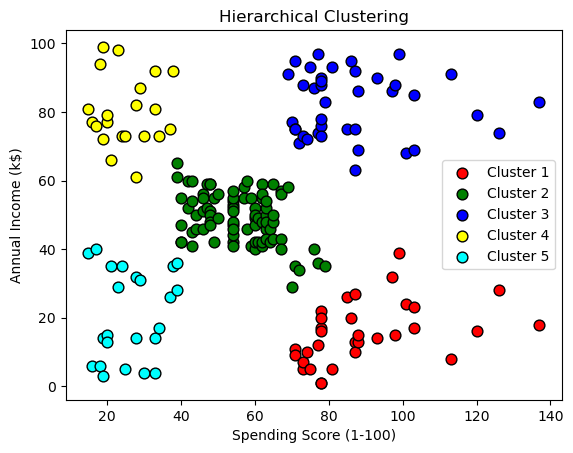

In [6]:
# Plot the data points for each cluster with different colors and labels
# Cluster 1
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], 
            color='red', s=60, label='Cluster 1', edgecolors='black')

# Cluster 2
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], 
            color='green', s=60, label='Cluster 2', edgecolors='black')

# Cluster 3
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], 
            color='blue', s=60, label='Cluster 3', edgecolors='black')

# Cluster 4
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], 
            color='yellow', s=60, label='Cluster 4', edgecolors='black')

# Cluster 5
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], 
            color='cyan', s=60, label='Cluster 5', edgecolors='black')

# Note: AgglomerativeClustering does not provide cluster centers, so the centroid plotting is commented out
# plt.scatter(hc.cluster_centers_[:, 0], hc.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid', edgecolors='black')

# Add a legend to the plot to label each cluster
plt.legend()

# Add a title to the plot
plt.title('Hierarchical Clustering')

# Label the y-axis
plt.ylabel('Annual Income (k$)')

# Label the x-axis
plt.xlabel('Spending Score (1-100)')

# Display the plot
plt.show()
